In [1]:
import uproot
import ROOT
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
import math
from array import array
%matplotlib inline

Welcome to JupyROOT 6.28/04


In [2]:
File = uproot.open("/work/cetin/LHCb/reco_tuner/data/ghost_data_B_default_weights.root:PrMatchNN_3e224c41.PrMCDebugMatchToolNN/MVAInputAndOutput")
allcolumns = File.arrays()

In [3]:
tracked = allcolumns[allcolumns["mc_quality"]==-1]
ghost = allcolumns[allcolumns["mc_quality"]==0]

In [4]:
tracked_v_qop = np.abs(ak.to_numpy(tracked["mc_end_velo_qop"]))
tracked_t_qop = np.abs(ak.to_numpy(tracked["mc_end_t_qop"]))

ghost_v_qop = np.abs(ak.to_numpy(ghost["mc_end_velo_qop"]))
ghost_t_qop = np.abs(ak.to_numpy(ghost["mc_end_t_qop"]))

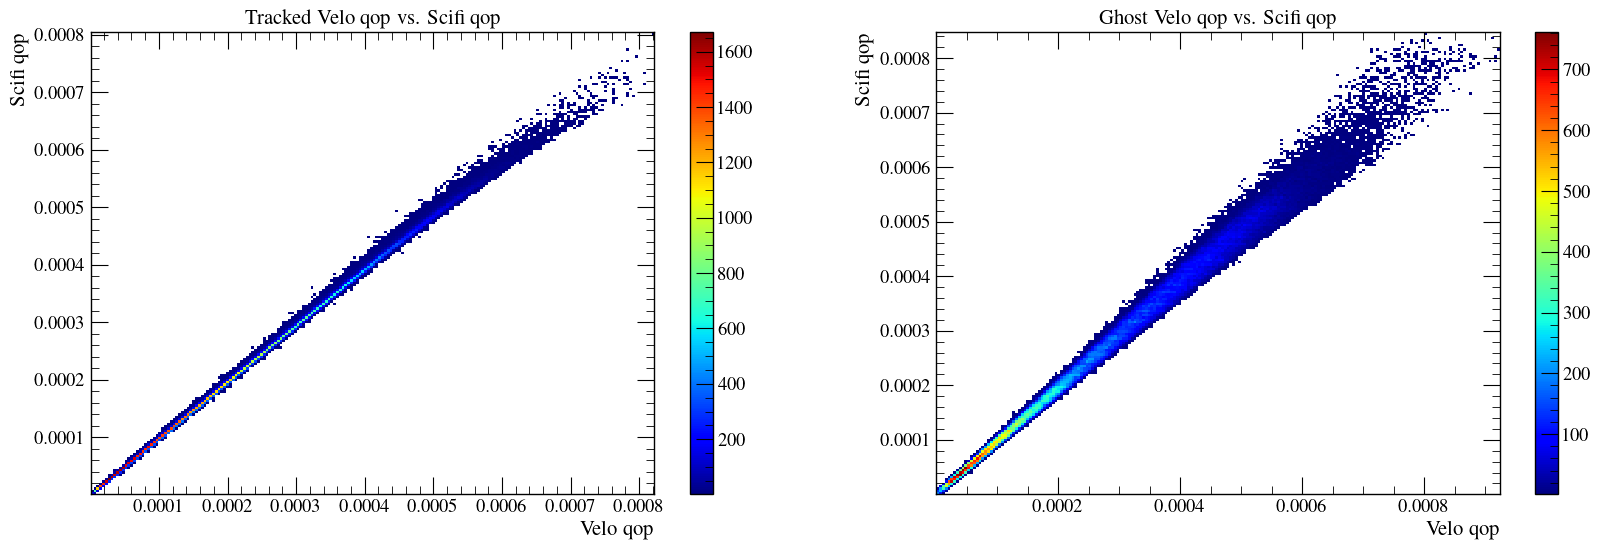

In [5]:


fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

a0=ax0.hist2d(tracked_v_qop[:180000], tracked_t_qop[:180000], bins=200,  cmap=plt.cm.jet, cmin=1)
ax0.set_xlabel("Velo qop")
ax0.set_ylabel("Scifi qop")
ax0.set_title("Tracked Velo qop vs. Scifi qop")
plt.colorbar(a0[3],ax=ax0)

a1=ax1.hist2d(ghost_v_qop[:180000], ghost_t_qop[:180000], bins=200,  cmap=plt.cm.jet, cmin=1)
ax1.set_xlabel("Velo qop")
ax1.set_ylabel("Scifi qop")
ax1.set_title("Ghost Velo qop vs. Scifi qop")
plt.colorbar(a1[3],ax=ax1)



plt.show()


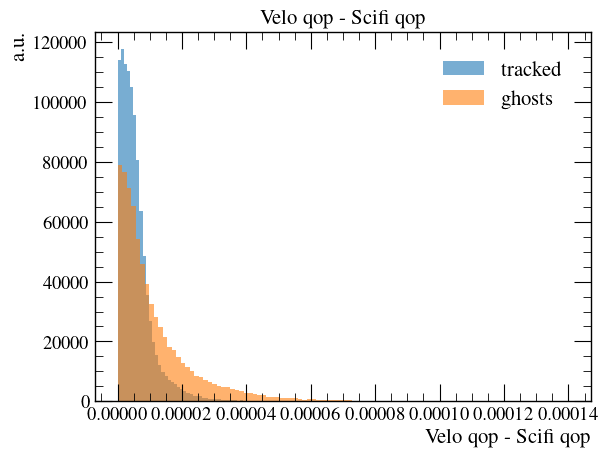

In [6]:
tracked_dQop = np.abs( tracked_v_qop[:180000]-tracked_t_qop[:180000] )
ghost_dQop = np.abs( ghost_v_qop[:180000]-ghost_t_qop[:180000] )


plt.hist(tracked_dQop, bins=100, label="tracked", alpha=0.6, density=True)
plt.hist(ghost_dQop, bins=100, label="ghosts", alpha=0.6, density=True)
plt.xlabel("Velo qop - Scifi qop")
plt.ylabel("a.u.")
plt.title("Velo qop - Scifi qop")
plt.legend()
#plt.colorbar(h2[3])
plt.show()

In [28]:
tracked_t_tx = ak.to_numpy(tracked["mc_end_t_tx"])
tracked_t_ty = ak.to_numpy(tracked["mc_end_t_ty"])

tracked_t_teta2 = tracked_t_tx * tracked_t_tx + tracked_t_ty * tracked_t_ty

tracked_v_tx = ak.to_numpy(tracked["mc_end_velo_tx"])
tracked_v_ty = ak.to_numpy(tracked["mc_end_velo_ty"])
tracked_v_teta2 = ak.to_numpy(tracked["mc_teta2"])

ghost_t_tx = ak.to_numpy(ghost["mc_end_t_tx"])
ghost_t_ty = ak.to_numpy(ghost["mc_end_t_ty"])

ghost_t_teta2 = ghost_t_tx * ghost_t_tx + ghost_t_ty * ghost_t_ty

ghost_v_tx = ak.to_numpy(ghost["mc_end_velo_tx"])
ghost_v_ty = ak.to_numpy(ghost["mc_end_velo_ty"])
ghost_v_teta2 = ak.to_numpy(ghost["mc_teta2"])

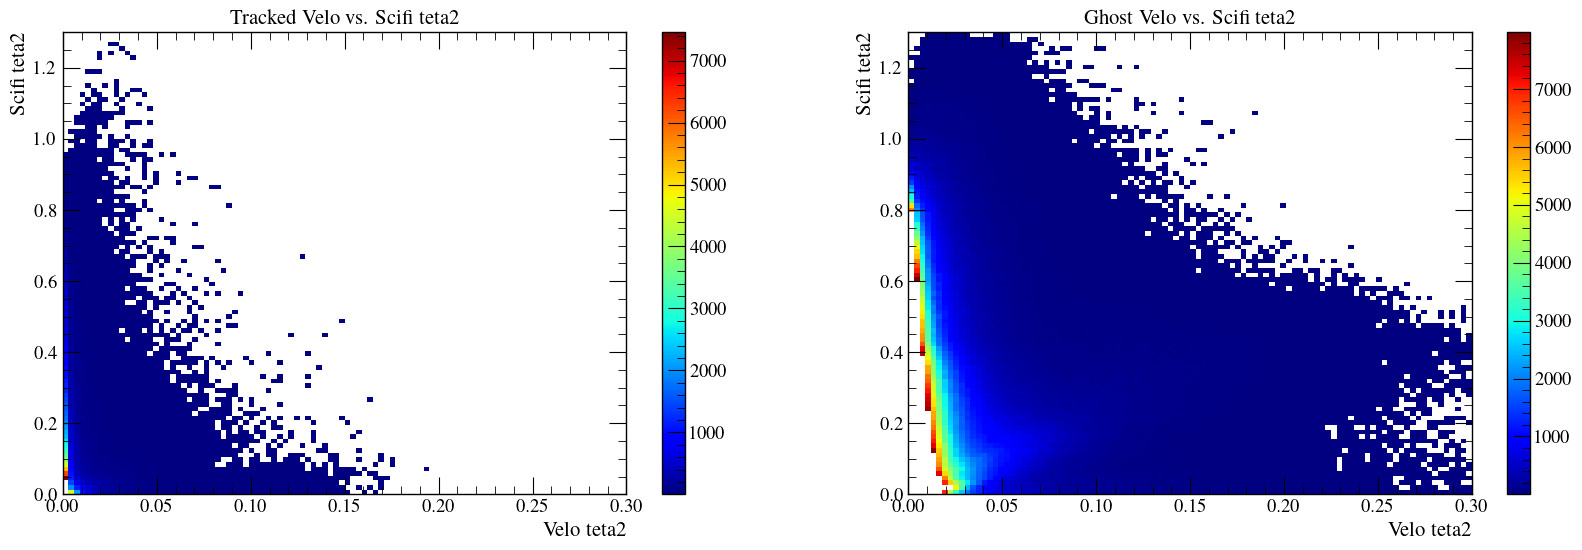

In [26]:

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

a0=ax0.hist2d(tracked_v_teta2, tracked_t_teta2, bins=100,  cmap=plt.cm.jet, cmin=1, range=[[0,0.3],[0,1.3]],cmax=8000)
ax0.set_xlabel("Velo teta2")
ax0.set_ylabel("Scifi teta2")
ax0.set_title("Tracked Velo vs. Scifi teta2")
plt.colorbar(a0[3],ax=ax0)

a1=ax1.hist2d(ghost_v_teta2, ghost_t_teta2, bins=100,  cmap=plt.cm.jet, cmin=1, range=[[0,0.3],[0,1.3]], cmax=8000)
ax1.set_xlabel("Velo teta2")
ax1.set_ylabel("Scifi teta2")
ax1.set_title("Ghost Velo vs. Scifi teta2")
plt.colorbar(a1[3],ax=ax1)



plt.show()


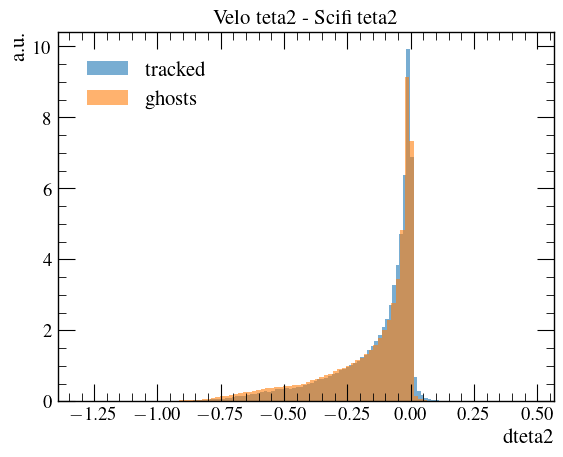

In [29]:
from numpy import abs

tracked_dteta2 = tracked_v_teta2-tracked_t_teta2
ghost_dteta2 = ghost_v_teta2-ghost_t_teta2

plt.hist(tracked_dteta2, bins=100, label="tracked", alpha=0.6, density=True)
plt.hist(ghost_dteta2, bins=100, label="ghosts", alpha=0.6, density=True)
plt.xlabel("dteta2")
plt.ylabel("a.u.")
plt.title("Velo teta2 - Scifi teta2")
plt.legend()
#plt.colorbar(h2[3])
plt.show()

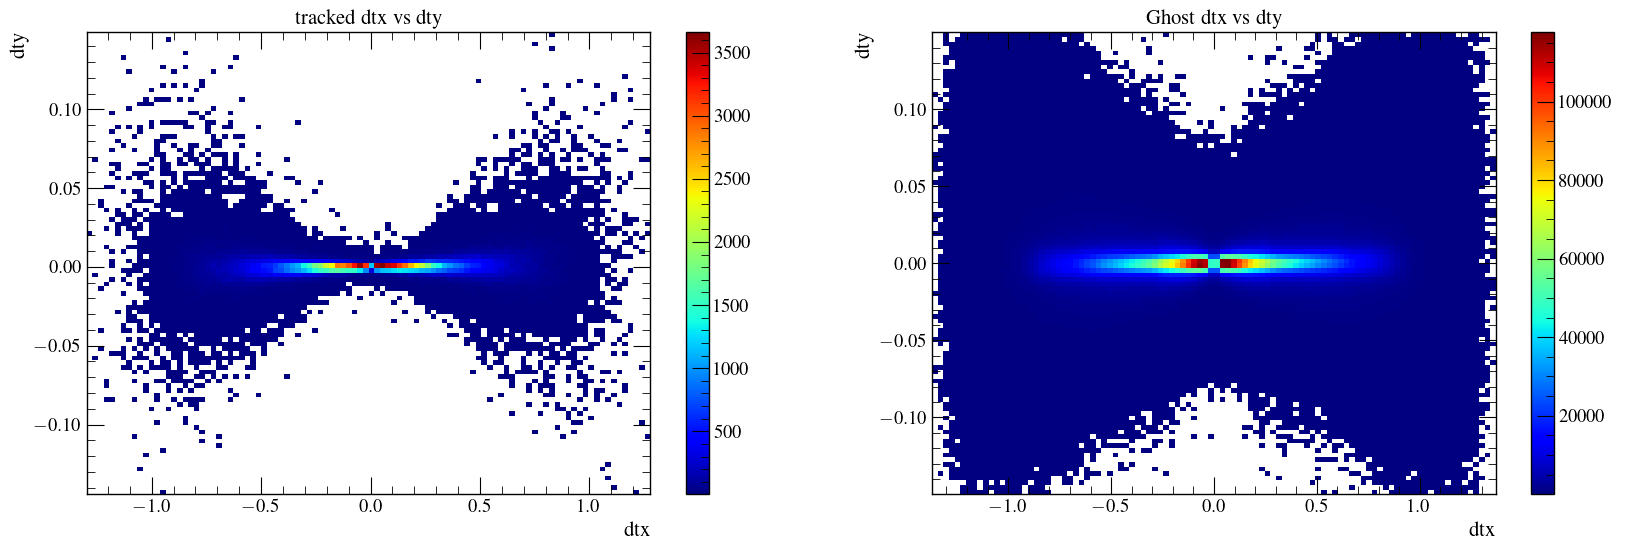

In [39]:

tracked_dtx = tracked_v_tx - tracked_t_tx
tracked_dty = tracked_v_ty - tracked_t_ty

ghost_dtx = ghost_v_tx - ghost_t_tx
ghost_dty = ghost_v_ty - ghost_t_ty


fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

a0=ax0.hist2d(tracked_dtx, tracked_dty, bins=100,  cmap=plt.cm.jet, cmin=1)
ax0.set_xlabel("dtx")
ax0.set_ylabel("dty")
ax0.set_title("tracked dtx vs dty")
plt.colorbar(a0[3],ax=ax0)

a1=ax1.hist2d(ghost_dtx, ghost_dty, bins=100,  cmap=plt.cm.jet, cmin=1)
ax1.set_xlabel("dtx")
ax1.set_ylabel("dty")
ax1.set_title("Ghost dtx vs dty")
plt.colorbar(a1[3],ax=ax1)



plt.show()

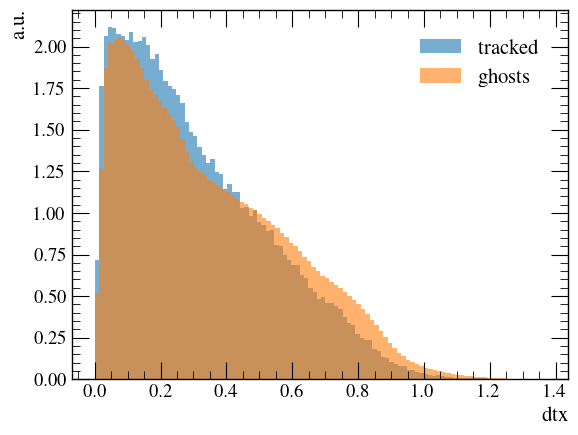

In [40]:


plt.hist(abs(tracked_dtx), bins=100, label="tracked", alpha=0.6, density=True)
plt.hist(abs(ghost_dtx), bins=100, label="ghosts", alpha=0.6, density=True)
plt.xlabel("dtx")
plt.ylabel("a.u.")
plt.legend()
#plt.colorbar(h2[3])
plt.show()

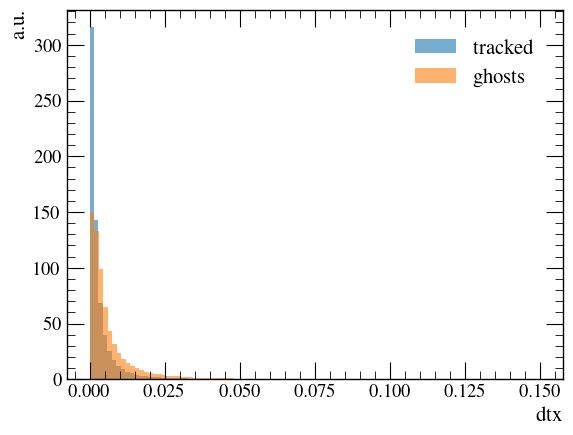

In [41]:
plt.hist(abs(tracked_dty), bins=100, label="tracked", alpha=0.6, density=True)
plt.hist(abs(ghost_dty), bins=100, label="ghosts", alpha=0.6, density=True)
plt.xlabel("dtx")
plt.ylabel("a.u.")
plt.legend()
#plt.colorbar(h2[3])
plt.show()

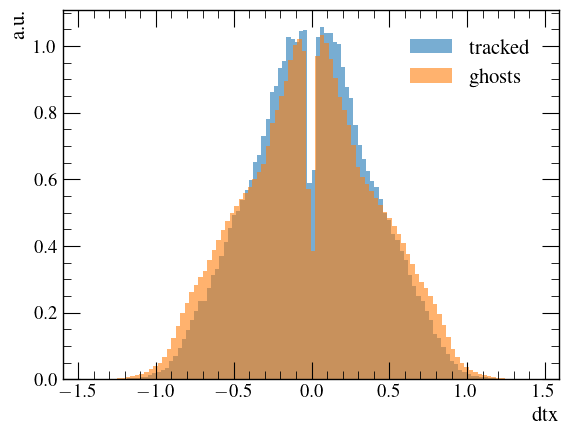

In [42]:
plt.hist(tracked_dtx-tracked_dty, bins=100, label="tracked", alpha=0.6, density=True)
plt.hist(ghost_dtx-ghost_dty, bins=100, label="ghosts", alpha=0.6, density=True)
plt.xlabel("dtx")
plt.ylabel("a.u.")
plt.legend()
#plt.colorbar(h2[3])
plt.show()

In [ ]:
tracked_zmag = tracked["mc_zMag"]
ghost_zmag = ghost["mc_zMag"]

In [ ]:
plt.hist(tracked_zmag, bins=100, label="tracked", alpha=0.6, density=True)
plt.hist(ghost_zmag, bins=100, label="ghosts", alpha=0.6, density=True)
plt.xlabel(r"$z_{mag}$")
plt.ylabel("a.u.")
plt.legend()
#plt.colorbar(h2[3])
plt.show()